In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from simforest import SimilarityForestRegressor, SimilarityTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import ResidualsPlot, PredictionError
from yellowbrick.model_selection import ValidationCurve, LearningCurve
from simforest.utils import plot_model_selection

%matplotlib inline
pd.options.display.max_columns = 500

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

/home/sfczekalski/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/sfczekalski/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


I will start with a mpg dataset, for which Similarity Forest performs better than Random Forest. The data have been taken from libsvm website, but it originaly comes from UCI Machine Learning Repository.

I am going to use some cross-validation, so I shuffled the data. What is also important is to scale the features.

In [2]:
X, y = load_boston(return_X_y=True)
y = y + np.abs(np.min(y))

random_state = np.random.RandomState(42)
shuffled_indices = random_state.permutation(len(y))
X, y = X[shuffled_indices], y[shuffled_indices]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Target distribution

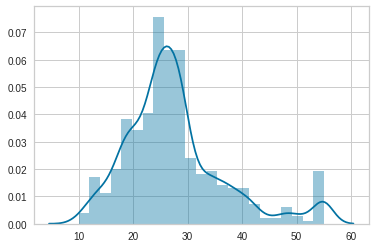

In [3]:
sns.distplot(y);

# Residual Plot

Residual plot tells us how a model fits the data. It can help to identify in which regions of target distribution our model makes the biggest mistakes. Both Random Forest and Similarity Forest make more mistakes for data-points with larger target value - it's probably due to the fact, that target distribution is a little bit negatively  skewed.

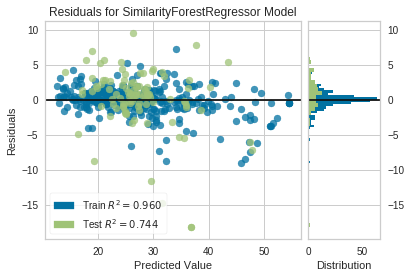

In [4]:
sf = SimilarityForestRegressor(n_estimators=100, random_state=42)
visualizer = ResidualsPlot(sf)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

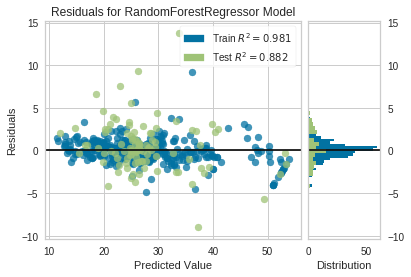

In [5]:
rf = RandomForestRegressor(random_state=42)
visualizer = ResidualsPlot(rf)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

Residual plots for the trees:

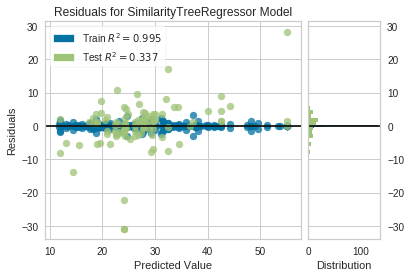

In [6]:
st = SimilarityTreeRegressor(random_state=42)
visualizer = ResidualsPlot(st)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

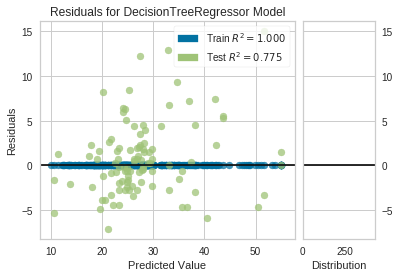

In [7]:
dt = DecisionTreeRegressor(random_state=42)
visualizer = ResidualsPlot(dt)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

# Prediction error plot

It may also be useful to check how fitted model's prediction correlate with actual target values.

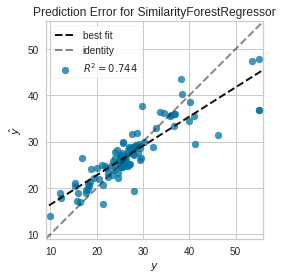

In [8]:
visualizer = PredictionError(sf)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

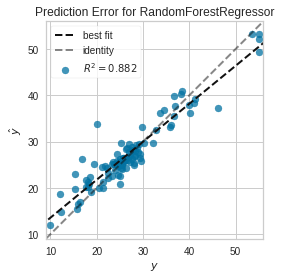

In [9]:
visualizer = PredictionError(rf)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

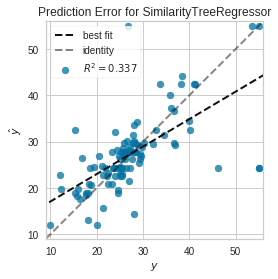

In [10]:
visualizer = PredictionError(st)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

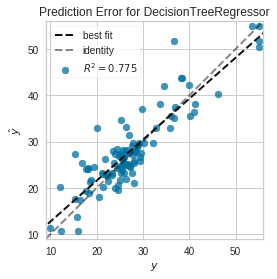

In [11]:
visualizer = PredictionError(dt)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

# Model selection

Both Random Forest's and Similarity Forest's results stabilize for 100 trees.

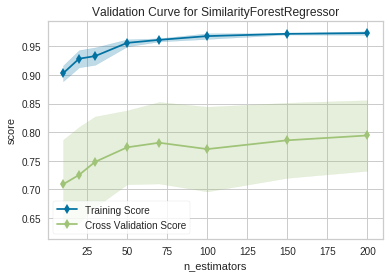

In [12]:
visualizer = ValidationCurve(
    SimilarityForestRegressor(), param_name='n_estimators',
    param_range=[10, 20, 30, 50, 70, 100, 150, 200], cv=5, scoring='r2'
)

visualizer.fit(X_train, y_train)
visualizer.show();

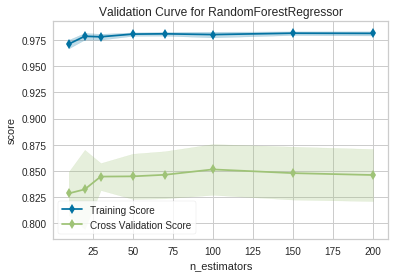

In [13]:
visualizer = ValidationCurve(
    RandomForestRegressor(), param_name='n_estimators',
    param_range=[10, 20, 30, 50, 70, 100, 150, 200], cv=5, scoring='r2'
)

visualizer.fit(X_train, y_train)
visualizer.show();

We can also control depth of the trees.

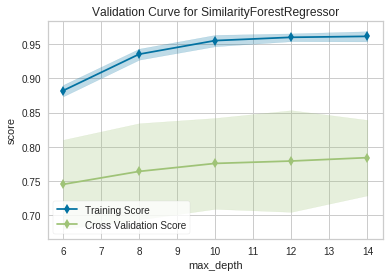

In [14]:
visualizer = ValidationCurve(
    SimilarityForestRegressor(n_estimators=100), param_name='max_depth',
    param_range=[6, 8, 10, 12, 14], cv=5, scoring='r2'
)

visualizer.fit(X_train, y_train)
visualizer.show();

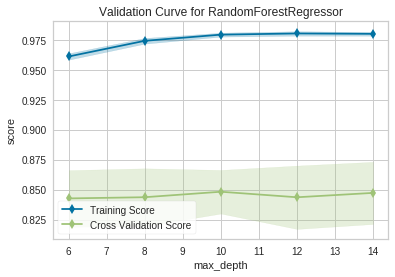

In [15]:
visualizer = ValidationCurve(
    RandomForestRegressor(), param_name='max_depth',
    param_range=[6, 8, 10, 12, 14], cv=5, scoring='r2'
)

visualizer.fit(X_train, y_train)
visualizer.show();

# Learning curve

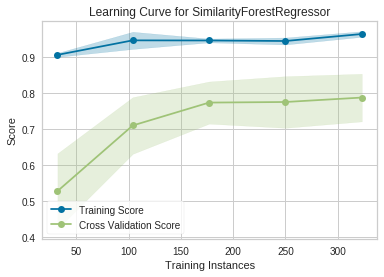

In [16]:
visualizer = LearningCurve(SimilarityForestRegressor(n_estimators=100), scoring='r2')

visualizer.fit(X_train, y_train)
visualizer.show();

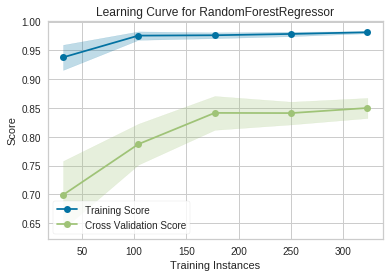

In [17]:
visualizer = LearningCurve(RandomForestRegressor(), scoring='r2')

visualizer.fit(X_train, y_train)
visualizer.show();